# Twitter data in Porto Alegre

##### this notebook presents a quick spatio-temporal analysis of geotagged tweets in Porto Alegre-RS, Brazil

##### Geotagged teets were collected between 16:00h of the 07/11/2018 and 16:00h of the 08/11/2018 (local time)
there was a connection problem between 4am and 6am and no tweets were collected during this period

##### The are for which tweets were collect is presented in the bellow image

##### The script used to collect the tweets (clisap_tstPOA.py) and the rasvested data are also available in this repository

author: Joao Meirelles

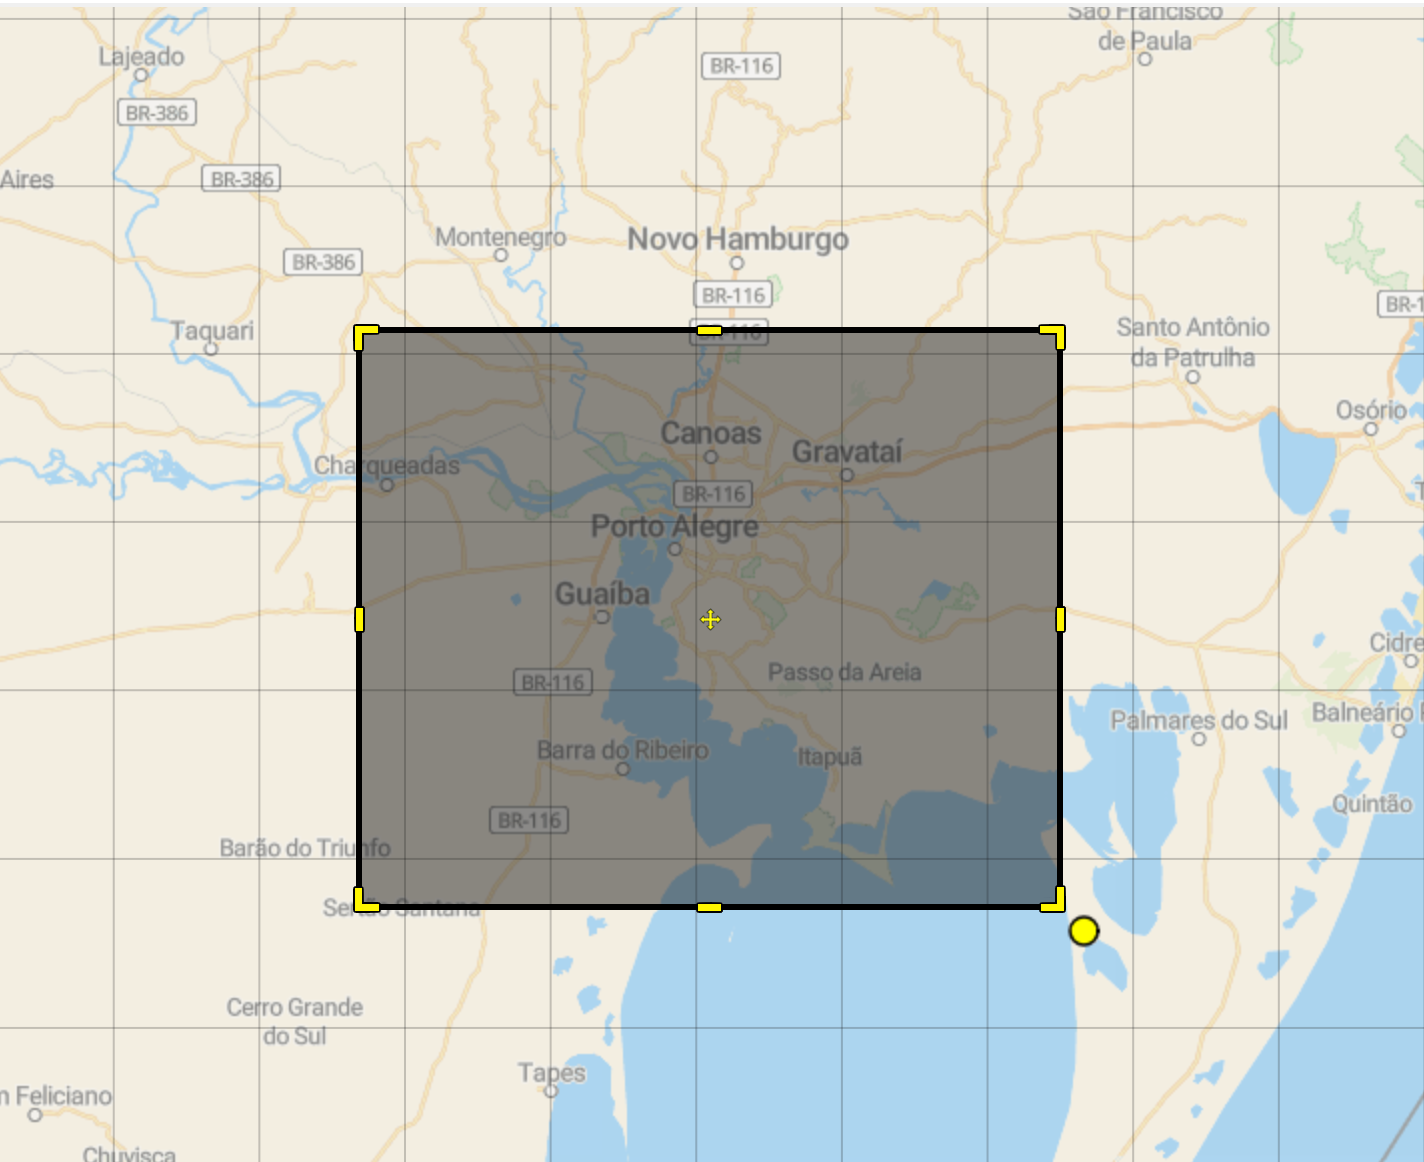

In [9]:
Image("area.png",width=500)


### Spatio-temporal analysis of twitter activity in POA

In [10]:
#import libraries
%matplotlib inline

from IPython.display import Image
import pandas as pd 
import os
os.environ['PROJ_LIB'] = '/home/jm/anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import warnings
import folium
warnings.filterwarnings('ignore')

In [11]:
#read data

df = pd.read_csv("poa_tst_plot.csv") 

print(len(df.index))
df = df.drop_duplicates() #drop duplicates and check if there were any
print(len(df.index))

df['date_time'] =  pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S') #format datatype
df.dtypes

df.set_index('date_time', drop=False, inplace=True) #set datetime as index
df  = df.loc['2018-11-07 16:00:00':'2018-11-08 16:00:00']


df.head()

1352
1329


,id,lang,text,date_time,lat,long
date_time,,,,,,
2018-11-07 16:00:20,2242859480,en,I'm at Biblioteca Central Guilherme Mylius - @...,2018-11-07 16:00:20,-30.034508,-51.198351
2018-11-07 16:00:50,1035009004584484864,es,😁 (@ Sorrifacil) https://t.co/AWsyUspfG6,2018-11-07 16:00:50,-30.107553,-51.315560
2018-11-07 16:03:42,1028783495328550912,pt,"I'm at Foro Central Prédio II in Porto Alegre,...",2018-11-07 16:03:42,-30.046745,-51.231086
2018-11-07 16:04:08,2619008207,pt,"I'm at Acrílicos Sinos in São Leopoldo, Rio Gr...",2018-11-07 16:04:08,-29.740217,-51.148606
2018-11-07 16:05:05,554709154,pt,"I'm at SOS Consultas Médicas in Porto Alegre, ...",2018-11-07 16:05:05,-30.050653,-51.211803


there where aprox 1300 tweets within those 24h in the region

#### Temporal dynamic
The volume of geotagget tweets collected in the region is small. 1/min in the peak hours.

Once were are unlilekly to be reaching the limit of the API (1% of global tweets volume), it can be inferred that the region is not very active in geotagged tweets. I can also be the case that we are beein limited by the API, would need to further investigate it.  

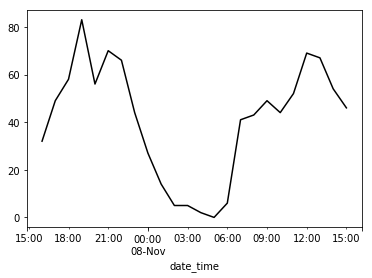

In [13]:
houraggregation = df['id'].groupby(pd.TimeGrouper(freq='60Min')).count()
#houraggregation.head()
#houraggregation.plot(kind='bar', color='k')
houraggregation.plot(color='k');

#### Spatial Distribution

It's possible to observe a few tweets outside of urban regions, but not enough to infere housing. 

In [21]:
# basemap
# Other tiles:
# OpenStreetMap, Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room
m = folium.Map(location=[-29.95, -51], tiles="Stamen Terrain", zoom_start=10)

# add tweets as points
for i in range(0,len(df)):
   folium.Circle(
      location=[df.iloc[i]['lat'], df.iloc[i]['long']],
      #popup=data.iloc[i]['name'],
      radius=50,
      color='crimson',
      fill=True,
      fill_color='crimson',
       opacity=1
   ).add_to(m)

m

#### night tweets

map of tweets between 23:00 and 05:00

likely to be home locations

In [18]:
#subset night tweets
df_night = df.loc['2018-11-07 23:00:00':'2018-11-08 05:00:00']

In [22]:
m = folium.Map(location=[-29.95, -51], tiles="Stamen Terrain", zoom_start=10)

for i in range(0,len(df_night)):
   folium.Circle(
      location=[df_night.iloc[i]['lat'], df_night.iloc[i]['long']],
      #popup=data.iloc[i]['name'],
      radius=50,
      color='blue',
      fill=True,
      fill_color='blue',
       opacity=1
   ).add_to(m)

m